In [ ]:
!pip install pandas

     |████████████████████████████████| 9.5 MB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 29.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip install seaborn

     |████████████████████████████████| 285 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 25.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip install scikit-learn

     |████████████████████████████████| 22.2 MB 464 kB/s  eta 0:00:01
     |████████████████████████████████| 303 kB 27.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NaNdalal-dev/income-classification/main/income_evaluation.csv')
df.shape

(32561, 15)

In [ ]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

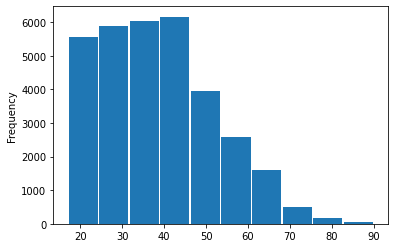

In [ ]:
df['age'].plot(kind='hist', rwidth=0.95)
plt.show()

### Working Class 

In [ ]:
df[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [ ]:
df = df[df[' workclass'] != ' Without-pay']

In [ ]:
df = df[df[' workclass'] != ' Never-worked']

In [ ]:
df[' occupation'][df[' workclass'] == ' ?'].value_counts()

 ?    1836
Name:  occupation, dtype: int64

#### Those who do not have workclass also don't have an occupation 

In [ ]:
df = df[df[' workclass'] != ' ?']

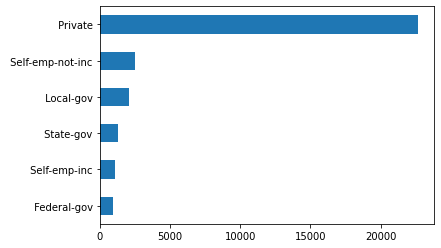

In [ ]:
df[' workclass'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc'], dtype=object)

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
df[' education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1019
 10th             831
 7th-8th          572
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name:  education, dtype: int64

### Checking income type of people who are educated at school level

In [ ]:
df[df[' education'] == ' 9th'][' income'].value_counts()

 <=50K    437
 >50K      26
Name:  income, dtype: int64

In [ ]:
df[df[' education'] == ' 10th'][' income'].value_counts()

 <=50K    771
 >50K      60
Name:  income, dtype: int64

In [ ]:
df[df[' education'] == ' 11th'][' income'].value_counts()

 <=50K    996
 >50K      60
Name:  income, dtype: int64

In [ ]:
df[df[' education'] == ' 12th'][' income'].value_counts()

 <=50K    362
 >50K      31
Name:  income, dtype: int64

In [ ]:
df[df[' education'] == ' Preschool'][' income'].value_counts()

 <=50K    46
Name:  income, dtype: int64

## **Replacing**
**Preschool,**
**1st-4th,**
**5th-6th,**
**7th-8th and**
**9th** 
## **with elementary**


In [ ]:
elemen_cols = [' 9th',' 1st-4th']
for col in elemen_cols:
    df[' education'][df[' education'] == col].value_counts()